# Analysis of Employee Exit Surveys

## Introduction

Every great leader should liberate each member of the team through high support and high challenge so that employees stay on the team and the organization flourishes. Unfortunately, this ideal isn't always achieved for various reasons like an employee seeking the next level of achievement in his career (and not finding opportunity at the present organization) or an employee resigning out of dissatisfaction.

We will explore reasons that affect why employees resign and when they resign. For example:

- Are employees who only worked for the organization for a short period of time resigning due to some kind of dissatisfaction?
- What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction?
- What about older employees?

To explore these questions, we will use some sample public data from exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

## Data Exploration and Overview


In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The DETE survey consists of 822 observations, each containing 56 columns of variables.

Many columns, such as 'ID' and 'SeparationType' appear to have complete data entries for each observation made; there are 822 values in these columns. However, on closer examination while some entries were left blank and thus became represented as clear null values, "NaN", other entries are also null values, "Not Stated", but are not correctly identified by our standard null value designation, "NaN".

Within a particular column, such as 'SeparationType' we can drill down and observe the responses and frequency of responses made for a specific question. For example, retirement due to age is the most common reason indicated under 'SeparationType'.

In [2]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

Some columns, however, do not have 822 entries--examples include, 'Business Unit' (126 entries) and 'Position' (817 entries). So, there are missing values where a question was either intentionally or unintentionally not answered. Another view (a count null values) of the columns shows which columns have missing values and how many are missing.

In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Next, we'll compare the column names, number, and missing values for the TAFE survey.

In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


There are a total of 702 observations in the TAFE survey. Column names vary substantially from the DETE survey, but similar data appears to reside in columns such as 'Reason for ceasing employment' (appears akin to 'SeparationType') and 'WorkArea' (appears akin to 'Business Unit')

In [5]:
print('TAFE Survey Categories of Separation\n')
print(tafe_survey['Reason for ceasing employment'].value_counts())
print('\nDETE Survey Categories of Separation\n')
print(dete_survey['SeparationType'].value_counts())

TAFE Survey Categories of Separation

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

DETE Survey Categories of Separation

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


Although there are fewer categories of reasons for ceasing employment in the TAFE survey (6) than the DETE survey (9), there are common categories that we'll be able to use to combine the data. The main different between the two surveys is the level of detail given for resignation: the DETE survey gives multiple reasons for retirement whereas the TAFE survey.

In [6]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

The TAFE survey also appears to have more instances of null values that the DETE survey. However, we'll first need to clean the "Not Stated" values in the DETE survey.

Overall, both data sets have many more columns of data than we'll need to answer our research questions. Additionally, there are multiple columns that we can use to triangulate research questions like whether an employee resigned due to dissatisfaction or not.

## Preparing the Data

We will import the DETE survey in again, this time using the pandas 'read_csv' function to identify instances of 'Not Stated' as null values.

Then we will drop many columns in each survey that do not directly relate to our research question:

- In the DETE survey we'll drop XXXX
- In the TAFE survey we'll drop XXXX

In [7]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)


Next, we'll need to rename columns in order to facilitate combining the data sets. Let's inspect the existing column names in the DETE survey:



In [8]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

And on to the TAFE survey--we'll update the column names according to the following dictionary since the original column names are quite long.



In [10]:
# create dictionary of old to new column names
tafe_cols_renamed = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
                     'Reason for ceasing employment': 'separationtype',
                     'Gender. What is your Gender?': 'gender',
                     'CurrentAge. Current Age': 'age',
                     'Employment Type. Employment Type': 'employment_status',
                     'Classification. Classification': 'position',
                     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                    }

tafe_survey_updated.rename(columns=tafe_cols_renamed, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [11]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The data sets are becoming more manageable with a smaller number of columns and a standardized column renaming we completed successfully. As we continue on, we'll remove additional columns as we hone in on the columns that relate to our research questions.

In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [15]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

# Create a copy of the resignations data selected
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()


In [16]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


We combined the various reasons for resignation in the DETE data set into a single designation, "Resignation", in order to match the TAFE data set. The three sub-categories of Resignation in the DETE data set, "-other reasons, -other employer, or -move overseas/interstate" are not particularly detailed enough for us to form a hard and fast disctinction between the three. For example, presumably employees that leave due to "-other reasons" do obtain a job with another employer. So, does the "-other employer" category mean that another employer actively recruited the employee out of the job ("poaching")? Maybe, or maybe not. It is difficult to come to any conclusion on this matter in a exit survey where employees are volunteering their responses and may not have a consistent understanding of each option of resignation. So, we have combined all resignation sub-categories into one overall category of resignation.

## Data Cleaning



In [17]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

There are eleven (11) null values in the data set for DETE, plus numerous years of 'cease_date' are listed as month and year. We will keep only the last four (4) numbers, year, of each date value.

In [18]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)


In [19]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

 2014.0     22
 2013.0    146
 2012.0    129
 2010.0      2
 2006.0      1
NaN         11
Name: cease_date, dtype: int64

Now, the DETE data set still have only eleven (11) null values, so we can rest assured that no null values were introduced by the cleaning of the dates to reflect only year.

The frequency table also reflects the correct combination of mo/year entries into their respective year entry. For example, year 2012 originally had (127) occurences along with two (2) occurences of 05/2012 and one (1) occurence of 07/2012. With those three (3) mo/year occurences combined into the overall 2012 frequency count, the new total is (127) occurences of 2012 in the data set.

So, we'll go ahead and reassign the cleaned DETE 'cease_dates" back to the overall DETE data set.

In [20]:
# Take the cleaned data from the series copy and reassign back to original data set
# dete_survey_updated['cease_date'] = dete_resignations['cease_date']

In [21]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

 2013.0     55
 2012.0     94
 2011.0    116
 2010.0     68
 2009.0      2
NaN          5
Name: cease_date, dtype: int64

Now, we'll plot several numeric columns in order to check for outlier data that may reflect some encoding errors.

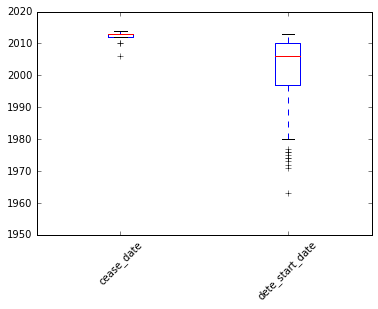

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

# Choose numeric columns from DETE to put in plot
dete_num_columns = ['cease_date', 'dete_start_date']

fig, ax = plt.subplots()

ax.boxplot(dete_resignations[dete_num_columns].dropna().values)
ax.set_ylim(1950,2020)
ax.set_xticklabels(dete_num_columns, rotation=45)
plt.show()

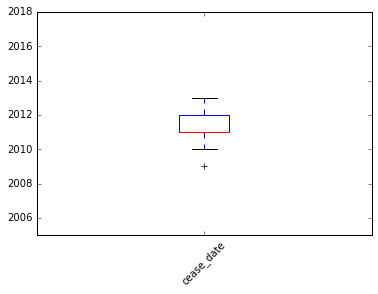

In [23]:
# Plot 'cease_date' column from TAFE

fig, ax = plt.subplots()

ax.boxplot(tafe_resignations['cease_date'].dropna().values)
ax.set_ylim(2005,2018)
ax.set_xticklabels(['cease_date'], rotation=45)
plt.show()

The range of dates within the begin/cease dates within the DETE and TAFE data sets is realistic. Although there are a few examples nearing potentially fifty (50) years on the job, this is not unheard of and an accomplishment indeed for both the employee and the organization!

## Adding Data

Although the DETE data set does not contain a years of service coulumn, we can calculate that amount with the difference between the cease date and the start date.

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts(dropna=False).sort_index(ascending=False)



 49.0     1
 42.0     1
 41.0     1
 39.0     3
 38.0     1
 36.0     2
 35.0     1
 34.0     1
 33.0     1
 32.0     3
 31.0     1
 30.0     2
 29.0     1
 28.0     2
 27.0     1
 26.0     2
 25.0     2
 24.0     4
 23.0     4
 22.0     6
 21.0     3
 20.0     7
 19.0     3
 18.0     5
 17.0     6
 16.0     5
 15.0     7
 14.0     6
 13.0     8
 12.0     6
 11.0     4
 10.0     6
 9.0     14
 8.0      8
 7.0     13
 6.0     17
 5.0     23
 4.0     16
 3.0     20
 2.0     14
 1.0     22
 0.0     20
NaN      38
Name: institute_service, dtype: int64

As we expected, there are some long-serving employees at forty-nine (49), forty-two (42), and forty-one (41) years of service.

## Analysis of Dissatisfaction

There are numerous columns of data that suggest that an employee resigned do to dissatisfaction.

In [25]:

tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [27]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    if value == '-':
        return False
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)


In [28]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

In [29]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [30]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

If there was any one factor in the nine (9) columns tied to dissatisfaction in the DETE data, then we marked the observation as an instance of employee dissatisfaction. The same process applied to the TAFE data, except that only two columns related to dissatisfaction were a part of the data set. Since the DETE data already had "True" and "False" values in the dissatisfaction-related columns, we retained those while using a function to change the TAFE data columns on dissatisfaction to "True" or "False" in order to match the DETE data.

##  Combining the Data Sets




In [31]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [32]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], 
                     ignore_index=True)

combined_updated = combined.dropna(thresh=500, axis=1).copy()

We've added a new column to each data set 'institute' that identifies the source data set to make comparisons easier once the sets are combined into one.

We concatenated the two (2) data sets so that all data in both sets is preserved and so that they are stacked "vertically" into the combined dataset.

## Cleaning Years of Service Data

Next, we need to clean up the values in the 'institute_service' column because it is formatted irregularly from row to row:

In [33]:
combined_updated['institute_service'].describe()

count                  563
unique                  49
top       Less than 1 year
freq                    73
Name: institute_service, dtype: object

In [34]:
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [35]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


There are forty-nine (49) unique values describing years of service:
    - some are strings, e.g., "Less than 1 year"
    - others are float values
    - others are number ranges listed as strings
    
We will clean and these standardize these using the following guidelines:
    - New: Less than 3 years at a company
    - Experienced: 3-6 years at a company
    - Established: 7-10 years at a company
    - Veteran: 11 or more years at a company


In [36]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'].describe()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



count     563
unique     42
top         1
freq      159
Name: institute_service_up, dtype: object

In [37]:
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

combined_updated['institute_service_up'].value_counts().sort_index()


0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service_up, dtype: int64

Now that we have cleaned the years of service data into a consistent float format consisting of only one (1) number, we'll bin the values into the career stages.

In [38]:
def car_stage(val):
    if val < 3:
        return 'New'
    elif  3 <= val <= 6:
        return 'Experienced'
    elif  7 <= val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan
    else:
        return "error"
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(car_stage)

# Check that there were no 'errors' introduced by the function
combined_updated['service_cat'].unique()
        

array(['Established', 'Veteran', 'Experienced', nan, 'New'], dtype=object)

Now we have four (4) bins representing career stage according to the pre-defined categories from this [article resource](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage)


## Analysis of Dissatisfaction Factors



In [39]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Earlier in our analysis we found the following True/False values for each of the separate data sets:

DETE:
- False    162
- True     149

TAFE:
- False    241
- True      91
- NaN        8

The combined data matches the proportion of True/False values that we expect with the combined data. We'll convert the eight (8) null values into "False", which is the most common value in the dataset. Only "True" values indicate an instance of dissatisfaction.

In [40]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [41]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

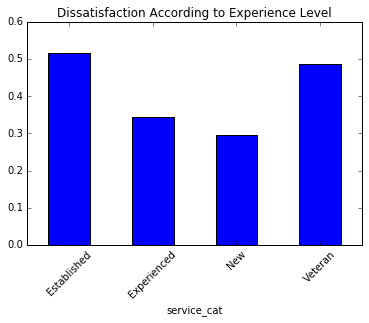

In [44]:
pivot_combined_up = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

%matplotlib inline

pivot_combined_up.plot(kind='bar', title='Dissatisfaction According to Experience Level', rot=45, legend=False)

Of the four (4) categories of experience, the highest levels of experience ("Veteran" and "Established") appear more likely to resign due to some level of dissatisfaction. Around 50% of resignations in both of those categories were due to some dissatisfaction, whereas 35% of "Experienced" employees resigned due to dissatisfaction and 30% of "New" employees resigned due to some dissatisfaction.